In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
acs_zip = pd.read_csv('../../data/geo_us_boundaries_zipcodes.csv')
acs_zip.head()

,zip_code,city,county,state_fips_code,state_code,state_name,fips_class_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,internal_point_lat,internal_point_lon,internal_point_geom,zip_code_geom
0,96778,"Nanawale Estates CDP, Ainaloa CDP, Hawaiian Be...",Hawaii County,15,HI,Hawaii,B5,G6350,S,696949939.0,27417316.0,19.438940,-155.028176,POINT(-155.0281756 19.4389404),"POLYGON((-155.25337 19.400201, -155.25337 19.3..."
1,89018,Indian Springs CDP,Clark County,32,NV,Nevada,B5,G6350,S,145450469.0,0.0,36.596156,-115.806455,POINT(-115.806455 36.596156),"POLYGON((-115.806455 36.596156, -115.804854 36..."
2,89161,Enterprise CDP,Clark County,32,NV,Nevada,B5,G6350,S,49591555.0,0.0,36.000360,-115.363877,POINT(-115.3638774 36.0003596),"POLYGON((-115.422656 36.015028, -115.422294 36..."
3,19940,Delmar town,Sussex County,10,DE,Delaware,B5,G6350,S,107163113.0,17386.0,38.477562,-75.564931,POINT(-75.5649307 38.4775616),"POLYGON((-75.698022 38.515524, -75.697955 38.5..."
4,96712,"Pupukea CDP, Haleiwa CDP, Kawela Bay CDP",Honolulu County,15,HI,Hawaii,B5,G6350,S,53632343.0,12294233.0,21.621367,-158.048011,POINT(-158.0480108 21.6213665),"POLYGON((-158.122431 21.588265, -158.122148 21..."


In [31]:
zip_zri_mult = pd.read_csv('../../data/zillow/Zip_Zri_MultiFamilyResidenceRental.csv', dtype = {'RegionName':str})
zip_zri_mult.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2930.0,2952.0,2926.0,...,3484.0,3523.0,3573.0,3622.0,3664.0,3698.0,3704.0,3692.0,3715.0,3676.0
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1447.0,1465.0,1469.0,...,1731.0,1749.0,1768.0,1787.0,1801.0,1806.0,1789.0,1761.0,1747.0,1731.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2797.0,2811.0,2813.0,...,3449.0,3459.0,3479.0,3491.0,3510.0,3521.0,3574.0,3608.0,3561.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,...,1226.0,1250.0,1264.0,1251.0,1246.0,1252.0,1280.0,1310.0,1294.0,1286.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1437.0,1469.0,1490.0,...,1888.0,1911.0,1934.0,1950.0,1953.0,1952.0,1921.0,1958.0,NaN,1916.0


In [32]:
zori = pd.read_csv('../../data/zillow/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv', dtype = {'RegionName':str})
zori.head()

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
0,61639,10025,1,"New York, NY",3062.0,3076.0,3089.0,3102.0,3115.0,3129.0,...,3277.0,3232.0,3188.0,3144.0,3098.0,3052.0,3006.0,2958.0,2910.0,2861.0
1,84654,60657,2,"Chicago, IL",1544.0,1550.0,1555.0,1561.0,1566.0,1571.0,...,1778.0,1771.0,1765.0,1758.0,1751.0,1743.0,1736.0,1728.0,1721.0,1713.0
2,61637,10023,3,"New York, NY",3104.0,3114.0,3124.0,3133.0,3142.0,3151.0,...,3233.0,3190.0,3148.0,3106.0,3061.0,3017.0,2973.0,2927.0,2880.0,2834.0
3,91982,77494,4,"Houston, TX",1738.0,1741.0,1744.0,1748.0,1751.0,1754.0,...,1759.0,1763.0,1767.0,1770.0,1774.0,1778.0,1782.0,1786.0,1790.0,1794.0
4,84616,60614,5,"Chicago, IL",1702.0,1707.0,1712.0,1717.0,1721.0,1726.0,...,1970.0,1958.0,1945.0,1932.0,1919.0,1906.0,1892.0,1878.0,1863.0,1849.0


In [33]:
def zero_zips(df):
    '''Adds zeros to beginning of zip codes that were chopped off when of int dtype
    
    Args:
    
    df: name of the DataFrame'''
    return df['RegionName'].apply(lambda Z: '0'*(5-len(Z))+Z)

In [34]:
zori['RegionName'] = zero_zips(zori)
zip_zri_mult['RegionName'] = zero_zips(zip_zri_mult)

In [35]:
counties = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']
msa = ['San Francisco, CA', 'San Jose, CA']

In [36]:
zri_sf_metro = zip_zri_mult[zip_zri_mult['CountyName'].isin(counties)]
zori_sf_metro = zori[zori['MsaName'].isin(msa)]

In [37]:
zori_sf_metro

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01
12,97564,94109,14,"San Francisco, CA",2259.0,NaN,NaN,2441.0,2500.0,2558.0,...,3045.0,3003.0,2961.0,2919.0,2876.0,2832.0,2788.0,2742.0,2696.0,2649.0
35,97771,94565,41,"San Francisco, CA",1395.0,1415.0,1434.0,1454.0,1473.0,1491.0,...,2320.0,2327.0,2334.0,2341.0,2348.0,2355.0,2362.0,2369.0,2376.0,2382.0
73,97711,94501,89,"San Francisco, CA",1668.0,1689.0,1711.0,1732.0,NaN,1774.0,...,2422.0,2420.0,2417.0,2415.0,2412.0,2409.0,2406.0,2403.0,2401.0,2398.0
78,97565,94110,95,"San Francisco, CA",2924.0,2986.0,NaN,3109.0,3168.0,3227.0,...,3871.0,3815.0,3759.0,3703.0,3644.0,3585.0,3526.0,3463.0,3400.0,3337.0
172,97743,94536,231,"San Francisco, CA",1931.0,1959.0,1986.0,2013.0,NaN,2067.0,...,2769.0,2767.0,2765.0,2762.0,2759.0,2757.0,2754.0,2751.0,2748.0,2746.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,97563,94108,5343,"San Francisco, CA",NaN,2031.0,NaN,NaN,NaN,2211.0,...,2883.0,2843.0,2795.0,2747.0,2698.0,2648.0,2597.0,2546.0,2494.0,2441.0
2499,97865,94920,6200,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,...,6395.0,6405.0,6415.0,6426.0,NaN,NaN,NaN,6449.0,6455.0,6462.0
2501,97899,94965,6225,"San Francisco, CA",NaN,NaN,NaN,NaN,2841.0,NaN,...,3613.0,3613.0,3613.0,3613.0,3612.0,3611.0,3609.0,3608.0,3606.0,3604.0
2523,97936,95030,6536,"San Jose, CA",NaN,NaN,NaN,2437.0,NaN,2498.0,...,3570.0,3569.0,3568.0,3567.0,3567.0,3566.0,3566.0,3566.0,3565.0,3565.0


## Pivot longer

In [38]:
zri_sf_metro = pd.melt(zri_sf_metro, id_vars =zri_sf_metro.columns[:7],
                value_vars = zri_sf_metro.columns[7:],
               var_name = 'Date',value_name = 'Rent')
zri_sf_metro['Date'] = pd.to_datetime(zri_sf_metro['Date'])
zri_sf_metro.rename(columns = {'RegionName':'Zipcode'}, inplace = True)

In [39]:
zri_sf_metro

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
0,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2010-09-01,NaN
1,97771,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2010-09-01,NaN
2,97711,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2010-09-01,1541.0
3,97565,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2010-09-01,NaN
4,97991,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2010-09-01,NaN
...,...,...,...,...,...,...,...,...,...
8244,97955,95054,Santa Clara,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1612,2020-01-01,2933.0
8245,97560,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0
8246,97836,94702,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1655,2020-01-01,2815.0
8247,97978,95110,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1745,2020-01-01,2666.0


In [40]:
zori_sf_metro = pd.melt(zori_sf_metro, id_vars =zori_sf_metro.columns[:4],
                value_vars = zori_sf_metro.columns[4:],
               var_name = 'Date',value_name = 'Rent')
zori_sf_metro['Date'] = pd.to_datetime(zori_sf_metro['Date'])
zori_sf_metro.rename(columns = {'RegionName':'Zipcode'}, inplace = True)

In [41]:
zori_sf_metro

,RegionID,Zipcode,SizeRank,MsaName,Date,Rent
0,97564,94109,14,"San Francisco, CA",2014-01-01,2259.0
1,97771,94565,41,"San Francisco, CA",2014-01-01,1395.0
2,97711,94501,89,"San Francisco, CA",2014-01-01,1668.0
3,97565,94110,95,"San Francisco, CA",2014-01-01,2924.0
4,97743,94536,231,"San Francisco, CA",2014-01-01,1931.0
...,...,...,...,...,...,...
8070,97563,94108,5343,"San Francisco, CA",2021-01-01,2441.0
8071,97865,94920,6200,"San Francisco, CA",2021-01-01,6462.0
8072,97899,94965,6225,"San Francisco, CA",2021-01-01,3604.0
8073,97936,95030,6536,"San Jose, CA",2021-01-01,3565.0


In [42]:
print(zori_sf_metro.shape)
print(zri_sf_metro.shape)
print(len(zori_sf_metro['Zipcode'].unique()))
print(len(zri_sf_metro['Zipcode'].unique()))

(8075, 6)
(8249, 9)
95
73


In [43]:
zri_sf_metro.isnull().sum(axis=0)

RegionID         0
Zipcode          0
City             0
State            0
Metro            0
CountyName       0
SizeRank         0
Date             0
Rent          3451
dtype: int64

In [44]:
missing_rents = zri_sf_metro[zri_sf_metro['Rent'].isnull()==True]
missing_rents

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
0,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2010-09-01,NaN
1,97771,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2010-09-01,NaN
3,97565,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2010-09-01,NaN
4,97991,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2010-09-01,NaN
5,97940,95035,Milpitas,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,206,2010-09-01,NaN
...,...,...,...,...,...,...,...,...,...
8095,97838,94704,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1531,2019-11-01,NaN
8149,98002,95134,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1061,2019-12-01,NaN
8207,97803,94601,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,753,2020-01-01,NaN
8233,97756,94549,Lafayette,CA,San Francisco-Oakland-Hayward,Contra Costa County,1317,2020-01-01,NaN


In [45]:
zri_sf_metro.groupby('Date').count()['RegionID']

Date
2010-09-01    73
2010-10-01    73
2010-11-01    73
2010-12-01    73
2011-01-01    73
              ..
2019-09-01    73
2019-10-01    73
2019-11-01    73
2019-12-01    73
2020-01-01    73
Name: RegionID, Length: 113, dtype: int64

In [46]:
missingness_percent = missing_rents.groupby(['Date']).count()[['RegionID']]/zri_sf_metro.groupby(['Date']).count()[['RegionID']]
missingness_percent.head()

,RegionID
Date,
2010-09-01,0.767123
2010-10-01,0.780822
2010-11-01,0.808219
2010-12-01,0.794521
2011-01-01,0.794521


In [47]:
missingness_percent = missing_rents.groupby('Zipcode').count()[['RegionID']]/zri_sf_metro.groupby('Zipcode').count()[['RegionID']]
missingness_percent.head()

,RegionID
Zipcode,
94010,0.389381
94014,0.469027
94025,0.371681
94040,0.389381
94061,0.194690


In [48]:
zori_sf_metro.isnull().sum(axis=0)

RegionID      0
Zipcode       0
SizeRank      0
MsaName       0
Date          0
Rent        697
dtype: int64

In [49]:
zri_sf_metro.groupby('Date')['Zipcode'].unique().tolist()[50]

array(['94109', '94565', '94501', '94110', '95123', '95035', '94544',
       '94568', '95051', '94509', '94541', '94538', '95014', '95112',
       '94080', '94087', '94086', '94806', '95008', '94115', '94117',
       '94102', '94611', '94577', '94403', '94103', '94114', '94107',
       '94010', '94605', '94066', '94601', '94610', '94025', '95126',
       '94901', '94606', '94040', '94608', '94404', '95404', '94804',
       '95050', '94123', '95129', '95128', '95134', '94061', '94401',
       '94014', '95116', '94588', '94903', '94602', '94063', '94607',
       '94530', '94549', '94596', '95117', '94609', '94603', '94801',
       '94612', '94621', '94704', '94085', '94703', '95054', '94105',
       '94702', '95110', '94158'], dtype=object)

In [50]:
zips_zori = zori_sf_metro['Zipcode'].unique()
zips_zri = zri_sf_metro['Zipcode'].unique()

In [51]:
len(pd.merge(zori_sf_metro, zri_sf_metro, how='inner', on='Zipcode')['Zipcode'].unique())

49

In [52]:
zori_sf_metro.head()

,RegionID,Zipcode,SizeRank,MsaName,Date,Rent
0,97564,94109,14,"San Francisco, CA",2014-01-01,2259.0
1,97771,94565,41,"San Francisco, CA",2014-01-01,1395.0
2,97711,94501,89,"San Francisco, CA",2014-01-01,1668.0
3,97565,94110,95,"San Francisco, CA",2014-01-01,2924.0
4,97743,94536,231,"San Francisco, CA",2014-01-01,1931.0


In [53]:
zri_sf_metro.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
0,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2010-09-01,NaN
1,97771,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2010-09-01,NaN
2,97711,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2010-09-01,1541.0
3,97565,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2010-09-01,NaN
4,97991,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2010-09-01,NaN


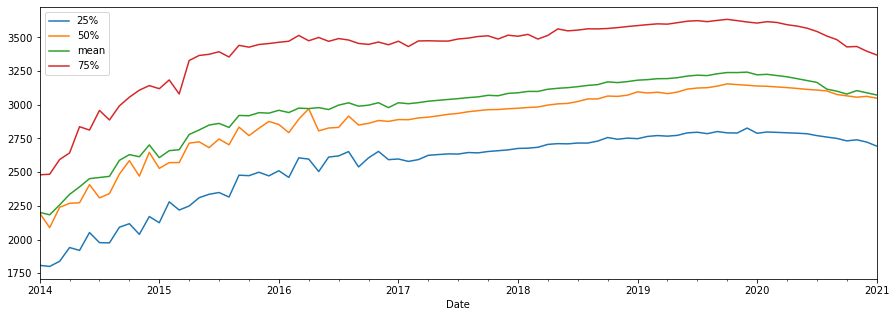

In [54]:
zori_sf_metro.groupby('Date')['Rent'].describe()[['25%','50%','mean','75%']].plot(figsize=(15,5))

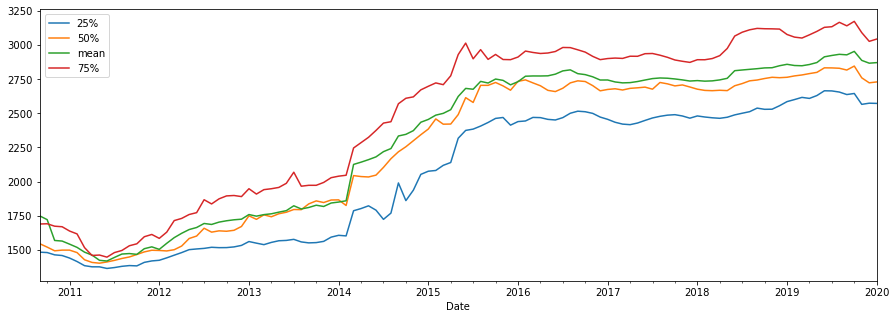

In [55]:
# zri_sf_metro[zri_sf_metro['City']=='San Francisco'].plot()
zri_sf_metro.groupby('Date')['Rent'].describe()[['25%','50%','mean','75%']].plot(figsize=(15,5))

## Imputing missing rents

In [82]:
fill_rents = zori_sf_metro[['Zipcode', 'Rent', 'Date']].copy()
# zori_sf_metro.drop('Rent', axis = 1, inplace = True)

fill_rents = fill_rents.reset_index().pivot(index = 'Date',columns = 'Zipcode')['Rent'].reset_index()
for code in fill_rents.columns[1:]:
     fill_rents[code].interpolate(inplace = True)
fill_rents.fillna(method = 'bfill',inplace = True)
fill_rents = pd.melt(fill_rents, id_vars='Date', 
                                  value_vars = fill_rents.columns[1:],
                                  var_name='Zipcode',value_name = 'Rent')
fill_rents

,Date,Zipcode,Rent
0,2014-01-01,94002,2117.0
1,2014-02-01,94002,2117.0
2,2014-03-01,94002,2144.0
3,2014-04-01,94002,2171.0
4,2014-05-01,94002,2199.0
...,...,...,...
8070,2020-09-01,95134,2839.0
8071,2020-10-01,95134,2815.0
8072,2020-11-01,95134,2788.0
8073,2020-12-01,95134,2762.0


In [102]:
# zori_sf_metro['RentImputed_linear'] = zori_sf_metro['Rent'].interpolate()
# zori_sf_metro[['RentImputed_poly_2']] = zori_sf_metro[['Rent']].interpolate(method='polynomial', order=2)
# # stated as an appropriate method for a growing time series
# zori_sf_metro[['RentImputed_quad']] = zori_sf_metro[['Rent']].interpolate(method='quadratic') 

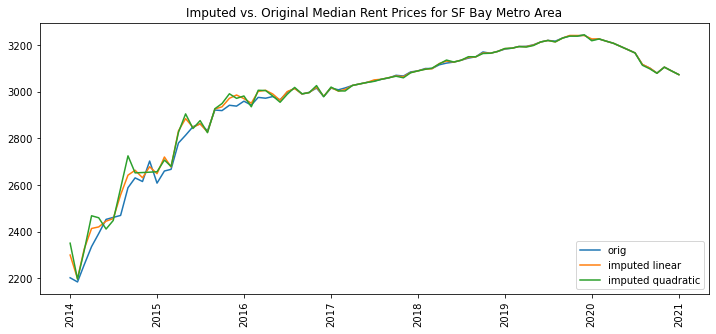

In [103]:
plt.figure(figsize=(12,5))
plt.plot(zori_sf_metro.groupby('Date')['Rent'].describe()[['mean']],label='orig')
plt.plot(zori_sf_metro.groupby('Date')['RentImputed_linear'].describe()[['mean']],label='imputed linear')
plt.plot(zori_sf_metro.groupby('Date')['RentImputed_quad'].describe()[['mean']],label='imputed quadratic')
plt.xticks(rotation = 90)
plt.legend(loc=4)
plt.title('Imputed vs. Original Median Rent Prices for SF Bay Metro Area')
plt.show()

In [79]:
zori_missing = zori_sf_metro['Rent'].isna()
zori_missing

0       False
1       False
2       False
3       False
4       False
        ...  
8070    False
8071    False
8072    False
8073    False
8074    False
Name: Rent, Length: 8075, dtype: bool

In [86]:
zori_sf_metro.isnull().sum()

RegionID         0
Zipcode          0
SizeRank         0
MsaName          0
Date             0
Rent           697
RentImputed      0
dtype: int64